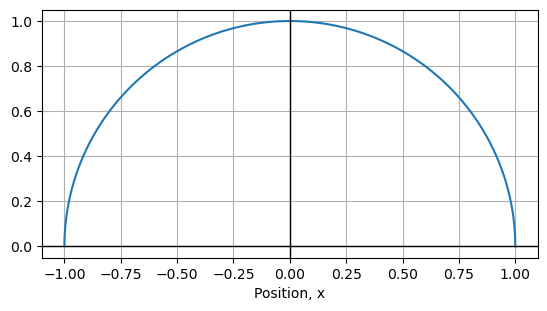

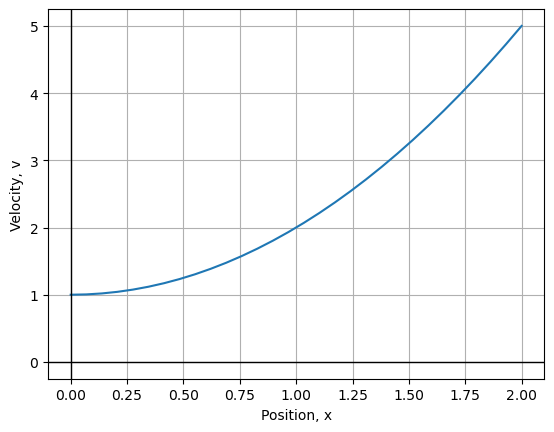

In [17]:
import numpy as np
import matplotlib.pyplot as plt

## Graph for hill
# Generate angles from 0 to pi (180 degrees)
theta = np.linspace(0, np.pi, 100)

# Calculate x and y coordinates for the half circle
x = np.cos(theta)
y = np.sin(theta)

# Plot the half circle
plt.plot(x, y)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlabel('Position, x')
plt.gca().set_aspect('equal', adjustable='box')  # Equal aspect ratio
plt.grid(True)
plt.show()

## Graph for velocity
def f(x):
    return 1+x ** 2  # Example equation: y = x^2

# Generate x values
x = np.linspace(0, 2, 30)  # Generates 100 points between start and end points

# Generate y values by applying the function to each x value
y = f(x)

# Plot the graph
plt.plot(x, y)

plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlabel('Position, x')
plt.ylabel('Velocity, v')
plt.grid(True)
plt.show()


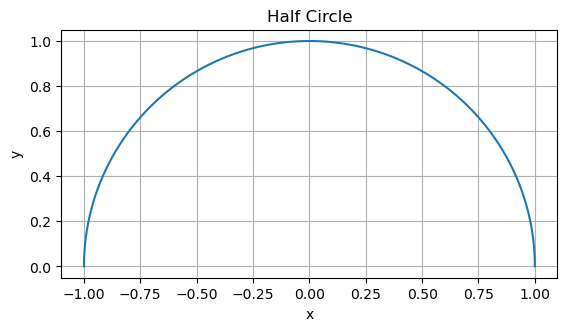

In [12]:
import numpy as np
import matplotlib.pyplot as plt
